This dataset includes a variety of features related to residential homes, such as transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitutde and longitude. The target variable is the house price of unit area.

In [71]:
import pandas as pd
from sklearn import linear_model #for linear reg
from sklearn.svm import SVR #for support vector
from sklearn.tree import DecisionTreeRegressor #for decision tree
from sklearn.ensemble import RandomForestRegressor #for random forest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [72]:
df = pd.read_csv("D:\Data Science\datasets\Other datasets\RealEstate.csv")

In [73]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [74]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [76]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

#### Target Variable:

- Price: The price of the real estate property is the variable you want to predict. This is a continuous variable, making it suitable for regression analysis.

#### Feature Variables:
The specific features can vary based on the columns available in the dataset, but here are some common features you might consider:

- Transaction date.
- House age 
- Distance to the nearest MRT station
- Number of convenience store 
- Location: The geographical location of the property (latitude and longitude, or any other location identifier).
- Other Property Features: Any other relevant features like the presence of amenities, year built, etc.

In [77]:
#Target and Feature Variables
X = df[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

In [78]:
#Divide the dataset among training and testing data in 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [79]:
#Create linear regression object
regr1 = linear_model.LinearRegression()

#Train the model using training sets
regr1.fit(X_train, y_train)

#Make predictions using testing set
y_pred1 = regr1.predict(X_test)

In [80]:
#Coefficients
print("Coefficients: \n",regr1.coef_)
#Intercept
print("Intercept:\n", regr1.intercept_)
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred1))
#Coefficient of determination: 1 is perfect prediction
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred1))

Coefficients: 
 [ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]
Intercept:
 -13044.231917160485
Mean Squared Error: 53.51
Coefficient of Determination: 0.68


## Decision Tree 

In [81]:
#Create decision tree object
regr2 = DecisionTreeRegressor(max_depth=5)

#Train the model using training sets
regr2.fit(X_train, y_train)

#Make predictions using testing set
y_pred2 = regr2.predict(X_test)

In [82]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred2))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred2))

Mean Squared Error: 36.40
Coefficient of Determination: 0.78


## Random Forest 

In [83]:
#Create decision tree object
regr3 = RandomForestRegressor(max_depth=2, random_state=0)

#Train the model using training sets
regr3.fit(X_train, y_train)

#Make predictions using testing set
y_pred3 = regr3.predict(X_test)

In [84]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred3))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred3))

Mean Squared Error: 45.66
Coefficient of Determination: 0.73


## Support Vector Machine 

In [85]:
#Create decision tree object
regr4 = SVR(C=5.0, epsilon=0.8)

#Train the model using training sets
regr4.fit(X_train, y_train)

#Make predictions using testing set
y_pred4 = regr4.predict(X_test)

In [86]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred4))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred4))

Mean Squared Error: 59.30
Coefficient of Determination: 0.65


## Preperation for Comparison

In [87]:
# Mean Squared Errors
mse_lr = mean_squared_error(y_test, y_pred1)
mse_dt = mean_squared_error(y_test, y_pred2)
mse_rf = mean_squared_error(y_test, y_pred3)
mse_svm = mean_squared_error(y_test, y_pred4)

In [88]:
#R2_Scores
r2_lr = r2_score(y_test, y_pred1)
r2_dt = r2_score(y_test, y_pred2)
r2_rf = r2_score(y_test, y_pred3)
r2_svm = r2_score(y_test, y_pred4)

In [89]:
#Matplotlib in rescue for visual comparison
import matplotlib.pyplot as plt

In [90]:
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines']
mse = [mse_lr, mse_dt, mse_rf, mse_svm]
cod = [r2_lr, r2_dt, r2_rf, r2_svm]

## Plot for Comparison wrt Mean Squared Error

Text(0, 0.5, 'Error')

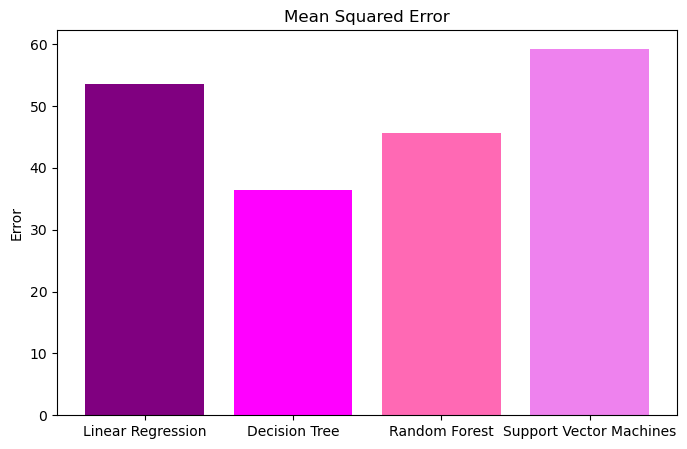

In [91]:
plt.figure(figsize=(8,5))
plt.bar(labels, mse, color=['purple','magenta','hotpink', 'violet'])
plt.title('Mean Squared Error')
plt.ylabel('Error')

In [93]:
# Choose the model with the lowest MSE
best_model = min([(mse_lr, 'Linear Regression'), (mse_dt, 'Decision Tree'), (mse_rf, 'Random Forest'), (mse_svm, 'SVM')])

print("Best Model:", best_model[1])

Best Model: Decision Tree


Among the all the Machine Learing Algorithms we used for the comparison, in case of Mean Squared Error, Decision Tree stood out to be the go to algorithm because we got the lowest value from this model

##### Increasing order of values
- Decision Tree - 36.40
- Random Forest - 45.66
- Linear Regression - 53.51
- Support Vector Machine - 59.30

## Plot for Comparison wrt Coefficient of Determination 

Text(0, 0.5, 'Error')

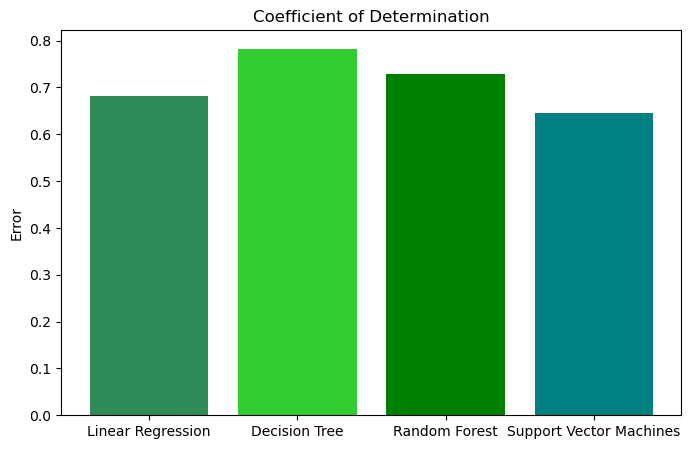

In [92]:
plt.figure(figsize=(8,5))
plt.bar(labels, cod, color=['seagreen','limegreen','green','teal'])
plt.title('Coefficient of Determination')
plt.ylabel('Error')

In [94]:
# Choose the model with the highest R2_Score
best_model = max([(r2_lr, 'Linear Regression'), (r2_dt, 'Decision Tree'), (r2_rf, 'Random Forest'), (r2_svm, 'SVM')])

print("Best Model:", best_model[1])

Best Model: Decision Tree


Among the all the Machine Learing Algorithms we used for the comparison, in case of Coefficient of Determination, Decision Tree stood out to be the go to algorithm because we got the highest value from this model

##### Decreasing order of values
- Decision Tree - 0.78
- Random Forest - 0.73
- Linear Regression - 0.68
- Support Vector Machine - 0.65

# Moment of Truth

Decision Tree turns out to be the best algorithm to go with in this case of comparison.